In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Case = pd.read_csv('Case.csv')
# 지역, 도시, 단체 감염 여부, 감염 케이스(장소), 확인된 누적 수, 위도, 경도
PatientInfo = pd.read_csv('PatientInfo.csv')
#성별, 태어난 년도, 나이(10대, 20대,), 국적, 지역, 질병, 감염 케이스(해외, 환자 접촉 등)
#감염 순서 (누구에 의해 감염되었는가), 접촉자 수, 감염증세 날짜, 확진 날짜, 공개 날짜, 
#사망한 날짜, 격리/석방/사망
Time = pd.read_csv('Time.csv')
# 날짜, 시간(오전, 오후), 검사 수, 음성, 양성 수, 격리해제, 사망자 수
TimeAge = pd.read_csv('TimeAge.csv')
#나이대 별 확진자 수와 사망자 수를 날짜에 따라 정리
TimeProvince = pd.read_csv('TimeProvince.csv')
#지역별 확진자 사망자 격리해제 수 날짜, 시간별로 정리
Policy = pd.read_csv('Policy.csv')

In [3]:
Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [4]:
Time.head(30)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0


# 전염병 경보 발령 이후의 확진자 추이

1. __전염병 경보 2단계 발령 후__ 
 - (2020년 1월 20일 ~ 27일)

In [5]:
Time_date = Time['date']
Time_test = Time['test']
Time_confirmed = Time['confirmed']

In [6]:
confirm_df = pd.DataFrame({'코로나 검사': Time_test, '확진자 수': Time_confirmed})
confirm_df = confirm_df.diff(1, axis=0)
confirm_df['날짜'] = Time_date
confirm_df.iloc[0, :2] = 1
level2_df = confirm_df.iloc[:8, :]
level2_df

,코로나 검사,확진자 수,날짜
0,1.0,1.0,2020-01-20
1,0.0,0.0,2020-01-21
2,3.0,0.0,2020-01-22
3,18.0,0.0,2020-01-23
4,5.0,1.0,2020-01-24
5,0.0,0.0,2020-01-25
6,24.0,1.0,2020-01-26
7,10.0,1.0,2020-01-27


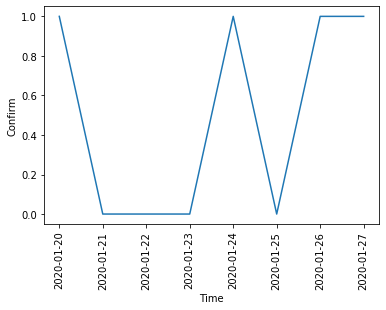

In [7]:
plt.plot(level2_df['날짜'], level2_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

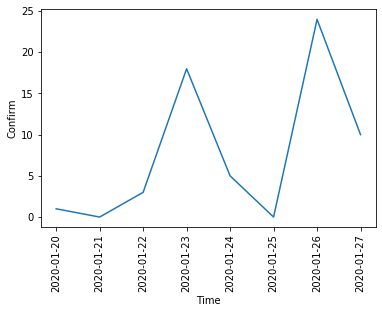

In [8]:
plt.plot(level2_df['날짜'], level2_df['코로나 검사'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. __전염병 경보 3단계 발령 후__ 
 - (2020년 1월 2일 ~ 2월 22일)

In [9]:
level3_df = confirm_df.iloc[8: 34]
level3_df

,코로나 검사,확진자 수,날짜
8,55.0,0.0,2020-01-28
9,71.0,0.0,2020-01-29
10,59.0,2.0,2020-01-30
11,66.0,5.0,2020-01-31
12,59.0,1.0,2020-02-01
13,58.0,3.0,2020-02-02
14,61.0,0.0,2020-02-03
15,117.0,1.0,2020-02-04
16,107.0,2.0,2020-02-05
17,171.0,5.0,2020-02-06


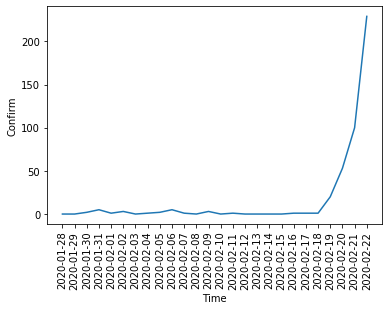

In [10]:
plt.plot(level3_df['날짜'], level3_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. __전염병 경보 4단계 발령 후__ 
 - (2020년 2월 23일 ~)

In [11]:
level4_df = confirm_df.iloc[34:]
level4_df

,코로나 검사,확진자 수,날짜
34,4593.0,169.0,2020-02-23
35,6577.0,231.0,2020-02-24
36,7548.0,144.0,2020-02-25
37,13249.0,284.0,2020-02-26
38,13099.0,505.0,2020-02-27
...,...,...,...
128,13401.0,40.0,2020-05-27
129,15790.0,79.0,2020-05-28
130,16454.0,58.0,2020-05-29
131,17781.0,39.0,2020-05-30


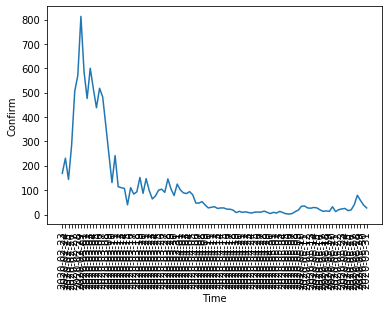

In [12]:
plt.plot(level4_df['날짜'], level4_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

코로나 검사를 받는 사람들이 늘어날 가능성이 보이자 3단계 전환, 대폭 늘어날 가능성이 보일 때 4단계로 전환하였음을 알 수 있었다.

# 사회적 거리두기에 따른 코로나 확진자 변화 양상

1. 사회적 거리두기를 실시하기 전

In [104]:
before_distance_df = confirm_df.iloc[:63]
before_distance_df

,코로나 검사,확진자 수,날짜
0,1.0,1.0,2020-01-20
1,0.0,0.0,2020-01-21
2,3.0,0.0,2020-01-22
3,18.0,0.0,2020-01-23
4,5.0,1.0,2020-01-24
...,...,...,...
58,8931.0,93.0,2020-03-18
59,11377.0,152.0,2020-03-19
60,9640.0,87.0,2020-03-20
61,10845.0,147.0,2020-03-21


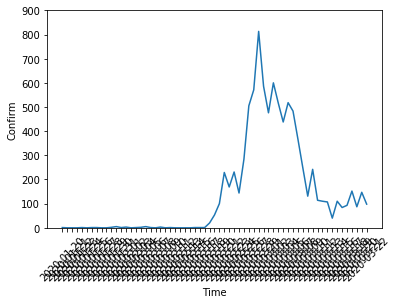

In [132]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_df['날짜'], before_distance_df['확진자 수'])
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. 강력한 사회적 거리두기 기간

In [106]:
strong_distance_df = confirm_df.iloc[63:91]
strong_distance_df

,코로나 검사,확진자 수,날짜
63,6256.0,64.0,2020-03-23
64,10546.0,76.0,2020-03-24
65,9314.0,100.0,2020-03-25
66,7046.0,104.0,2020-03-26
67,12019.0,91.0,2020-03-27
68,10964.0,146.0,2020-03-28
69,6216.0,105.0,2020-03-29
70,1053.0,78.0,2020-03-30
71,15370.0,125.0,2020-03-31
72,10983.0,101.0,2020-04-01


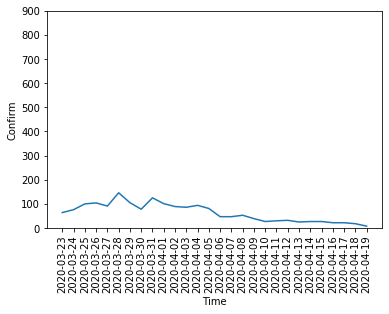

In [107]:
plt.plot(strong_distance_df['날짜'], strong_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 900)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

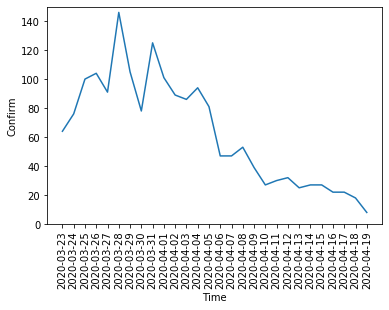

In [113]:
plt.plot(strong_distance_df['날짜'], strong_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2-1 사회적 거리두기 직전의 확진자 수와 직후의 확진자 수가 비슷해 사회적 거리두기를 실시하기 전 10일, 후 10일의 데이터를 시각화해보았다.

In [117]:
between_distance_df = confirm_df.iloc[54:74]
between_distance_df

,코로나 검사,확진자 수,날짜
54,12688.0,107.0,2020-03-14
55,6877.0,40.0,2020-03-15
56,6292.0,110.0,2020-03-16
57,12212.0,84.0,2020-03-17
58,8931.0,93.0,2020-03-18
59,11377.0,152.0,2020-03-19
60,9640.0,87.0,2020-03-20
61,10845.0,147.0,2020-03-21
62,4271.0,98.0,2020-03-22
63,6256.0,64.0,2020-03-23


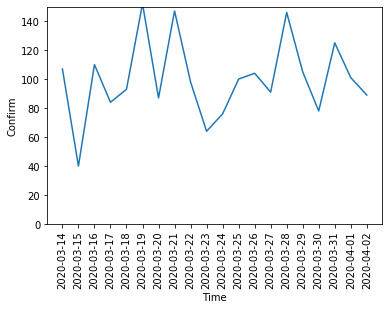

In [118]:
plt.plot(between_distance_df['날짜'], between_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. 약한 사회적 거리두기 기간

In [108]:
weak_distance_df = confirm_df.iloc[91:107]
weak_distance_df

,코로나 검사,확진자 수,날짜
91,3926.0,13.0,2020-04-20
92,7979.0,9.0,2020-04-21
93,6945.0,11.0,2020-04-22
94,6012.0,8.0,2020-04-23
95,5549.0,6.0,2020-04-24
96,5641.0,10.0,2020-04-25
97,3124.0,10.0,2020-04-26
98,3375.0,10.0,2020-04-27
99,6854.0,14.0,2020-04-28
100,5683.0,9.0,2020-04-29


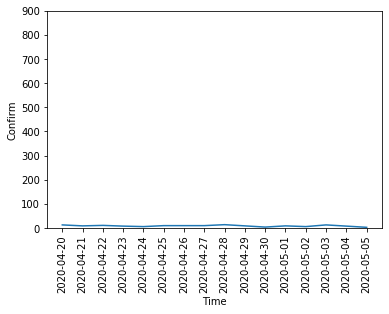

In [109]:
plt.plot(weak_distance_df['날짜'], weak_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 900)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

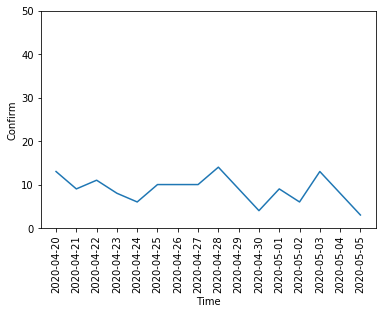

In [110]:
plt.plot(weak_distance_df['날짜'], weak_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

4. 거리두기가 끝난 후

In [111]:
after_distance_df = confirm_df.iloc[107:]
after_distance_df

,코로나 검사,확진자 수,날짜
107,2858.0,2.0,2020-05-06
108,6293.0,4.0,2020-05-07
109,5475.0,12.0,2020-05-08
110,5167.0,18.0,2020-05-09
111,3856.0,34.0,2020-05-10
112,4606.0,35.0,2020-05-11
113,12398.0,27.0,2020-05-12
114,15030.0,26.0,2020-05-13
115,15564.0,29.0,2020-05-14
116,15263.0,27.0,2020-05-15


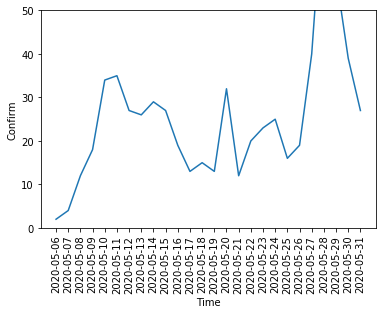

In [112]:
plt.plot(after_distance_df['날짜'], after_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()